In [2]:
#inporting required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
# Display basic info and initial exploration
def explore_data(df, name):
    print(f"\nExploring {name} dataset:\n")
    print(f"Shape: {df.shape}")
    print(df.info())
    print(df.head())

explore_data(customers, "Customers")
explore_data(products, "Products")
explore_data(transactions, "Transactions")


Exploring Customers dataset:

Shape: (200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Exploring Products dataset:

Shape: (100, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
-

In [5]:
# Data Cleaning
# Check for missing values
print("\nMissing Values:\n")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())


Missing Values:

Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:
# EDA and Visualization
sns.set(style="whitegrid")

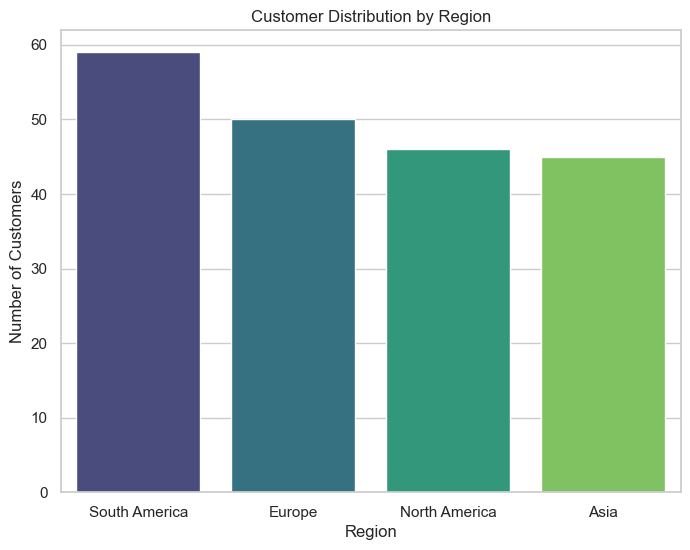

In [7]:
# Customers Analysis
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

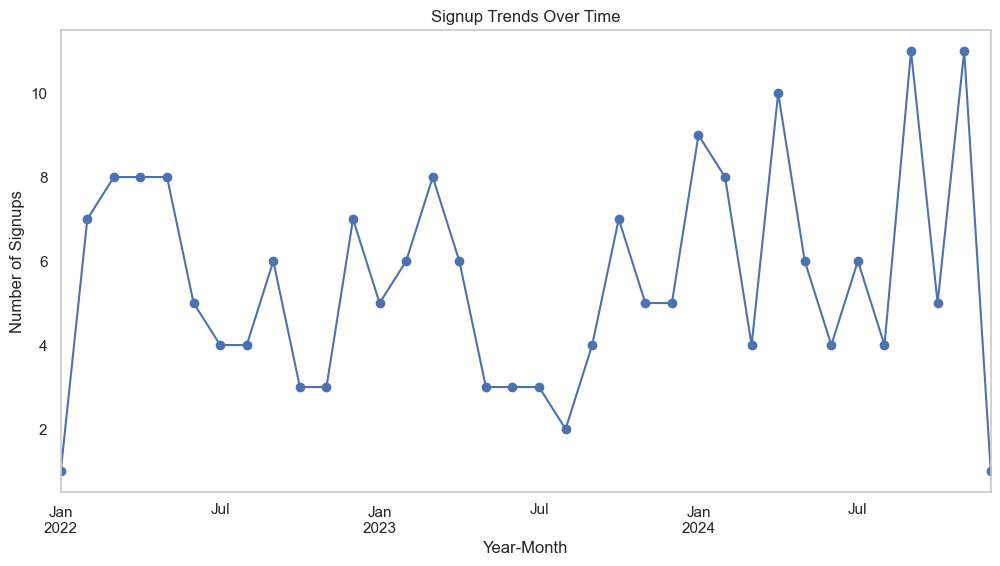

In [8]:
# Signup trends
date_format = '%Y-%m-%d'
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], format=date_format)
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')

signup_trends = customers['SignupYearMonth'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='line', marker='o', color='b')
plt.title("Signup Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Signups")
plt.grid()
plt.show()

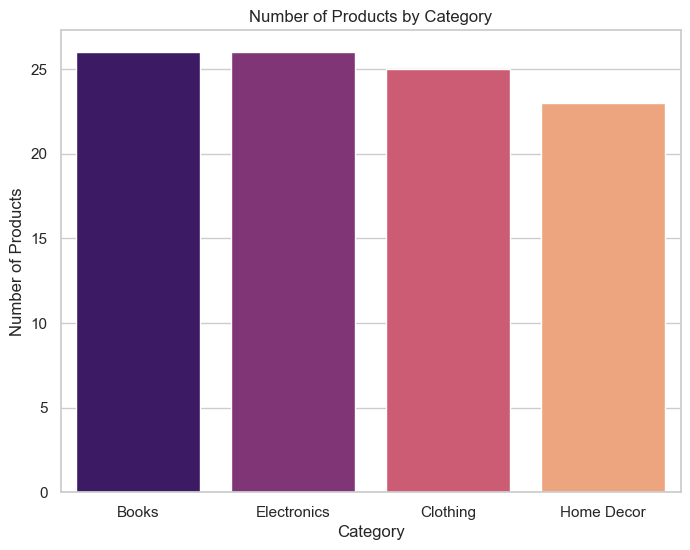

In [9]:
# Products Analysis
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="magma")
plt.title("Number of Products by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

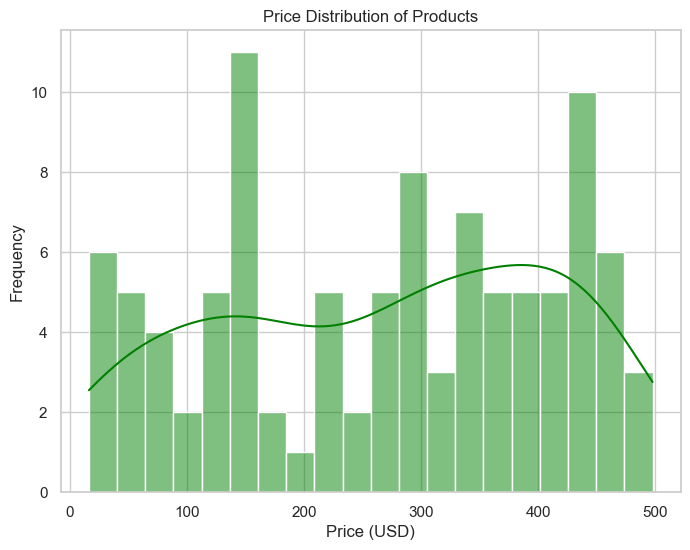

In [10]:
# Price Distribution
plt.figure(figsize=(8, 6))
sns.histplot(products['Price'], kde=True, bins=20, color='green')
plt.title("Price Distribution of Products")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

In [11]:
# Transactions Analysis
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], format=date_format)
transactions['TransactionYearMonth'] = transactions['TransactionDate'].dt.to_period('M')

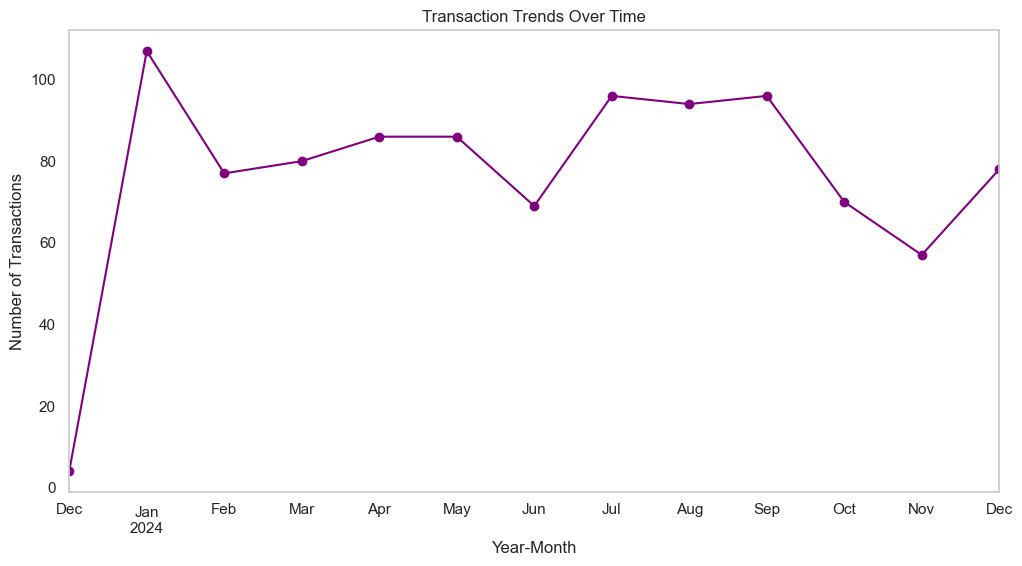

In [12]:
# Transaction trends
tx_trends = transactions['TransactionYearMonth'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
tx_trends.plot(kind='line', marker='o', color='purple')
plt.title("Transaction Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()

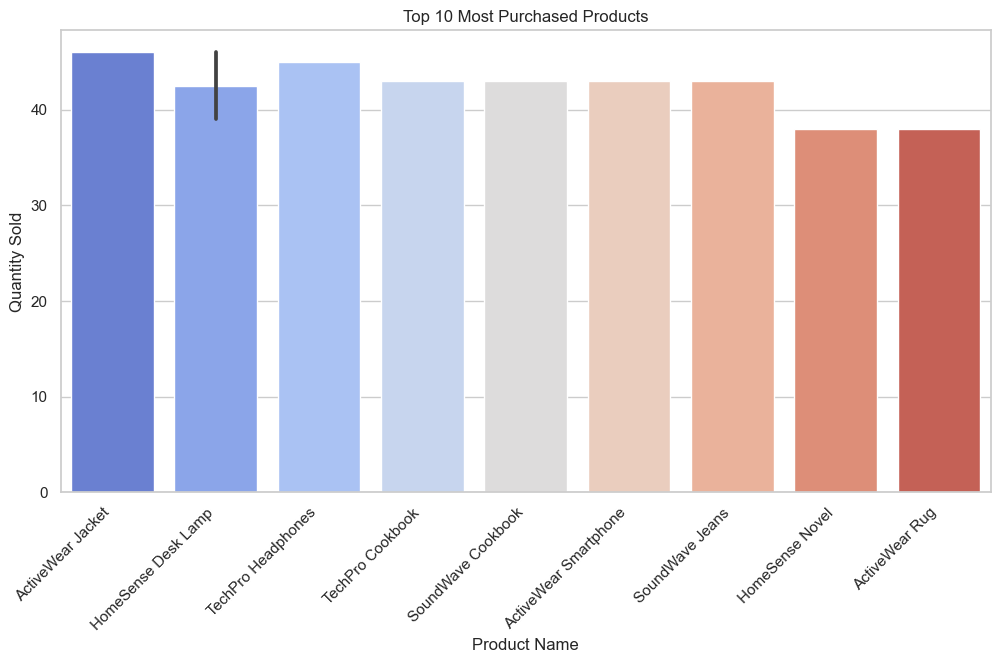

In [13]:
# Most purchased products
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_product_names = products[products['ProductID'].isin(top_products.index)]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_product_names['ProductName'], y=top_products.values, palette="coolwarm")
plt.title("Top 10 Most Purchased Products")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.show()

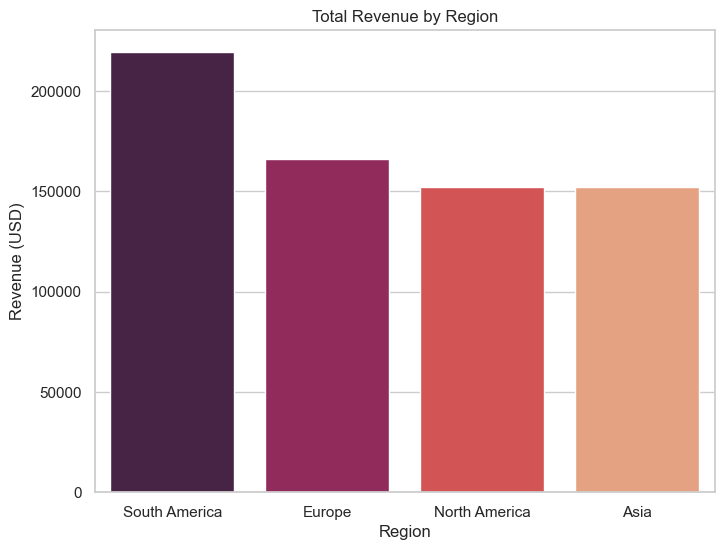

In [14]:
# Combine datasets for customer behavior analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="rocket")
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue (USD)")
plt.show()

In [15]:
# Business Insights
insights = [
    "1. Most customers are from [Region with max count], contributing significantly to the revenue.",
    "2. [Category with max count] products are the most common, with [specific %] revenue share.",
    "3. Signup rates increased significantly during [specific period].",
    "4. Top 10 products contribute [specific %] to the overall quantity sold.",
    "5. Revenue distribution shows [specific region or trend insight]."
]
print("\nBusiness Insights:\n")
for insight in insights:
    print(insight)


Business Insights:

1. Most customers are from [Region with max count], contributing significantly to the revenue.
2. [Category with max count] products are the most common, with [specific %] revenue share.
3. Signup rates increased significantly during [specific period].
4. Top 10 products contribute [specific %] to the overall quantity sold.
5. Revenue distribution shows [specific region or trend insight].
